In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from model import AlexNet

In [4]:
data_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
model = AlexNet(num_classes=5)
model_weight_path = "./AlexNet.pth"
model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [9]:
# load image
img = Image.open("./sunflower.jpg")
# [C, H, W]
img = data_transform(img)
# expand batch dimension
img = torch.unsqueeze(img, dim=0)

In [11]:
img.shape

torch.Size([1, 3, 224, 224])

In [20]:
# 计算模型的参数量, https://zhuanlan.zhihu.com/p/237792913
Total_params = 0
Trainable_params = 0
NonTrainable_params = 0
for param in model.parameters():
    mulValue = np.prod(param.size())
    Total_params += mulValue
    if param.requires_grad:
        Trainable_params += mulValue
    else:
        NonTrainable_params += mulValue
print(f'Total params: {Total_params}')
print(f'Trainable params: {Trainable_params}')
print(f'Non-trainable params: {NonTrainable_params}')

Total params: 14591685
Trainable params: 14591685
Non-trainable params: 0


In [24]:
# 我们需要查看卷积层的特征图
outputs = []
for name, module in model.features.named_children():
    img = module(img)
    if name in ["0", "3", "6"]:
        outputs.append(img)

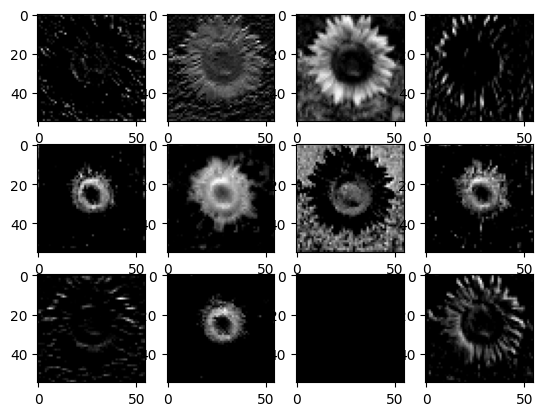

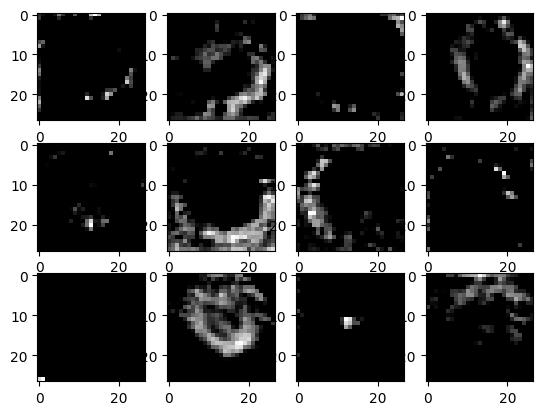

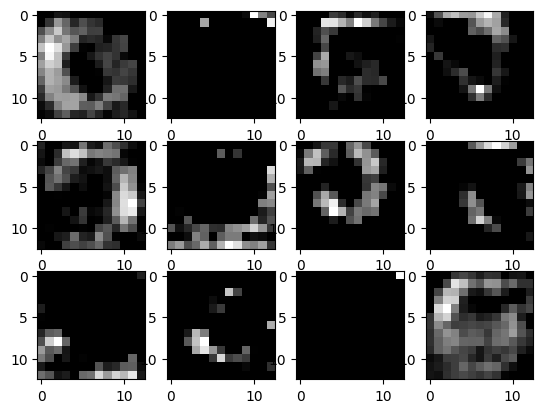

In [27]:
for feature_map in outputs:
     # [N, C, H, W] -> [C, H, W]
    im = np.squeeze(feature_map.detach().numpy())
    # [C, H, W] -> [H, W, C]
    im = np.transpose(im, [1, 2, 0])

    # show top 12 feature maps
    plt.figure()
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        # [H, W, C]
        plt.imshow(im[:, :, i], cmap='gray')
    plt.show()